### Importing libraries


### Importing dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6d84fc410ede4ce88805d06fc0776712 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7jy2fxic8_FvQn6D9FmxLmscdtOkEhMY6bcwY3fudsFj',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_6d84fc410ede4ce88805d06fc0776712.get_object(Bucket='myproject-donotdelete-pr-nyqkagjlxgjsks',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)
df1.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [3]:
column_dict = {'Life expectancy ':'Life expectancy', 'infant deaths':'Infant deaths', 'percentage expenditure':'Percentage expenditure', 'Measles ':'Measles', 
               ' BMI ':'BMI', 'under-five deaths ':'Under 5 deaths', 'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
               ' thinness  1-19 years':'Thinness 1-19 years', ' thinness 5-9 years':'Thinness 5-9 years'}

In [4]:
df1.rename(columns = column_dict, inplace = True)

In [6]:
df1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'Percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'Under 5 deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness 1-19 years',
       'Thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

### Statistical summary of the data 

In [7]:
df1.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under 5 deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
Infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
Percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
BMI                                2904 non-null float64
Under 5 deaths                     2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
HIV/AIDS                           2938 non-null

In [9]:
df1.shape

(2938, 22)

### Missing data is replaced with mean

In [10]:
df1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
Percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
Under 5 deaths                       0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness 1-19 years                 34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
df1.fillna(df1.mean(), inplace = True)

In [12]:
df1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
Percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
Under 5 deaths                     0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness 1-19 years                0
Thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Using unique() method to map data of object type

In [13]:
df1.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [14]:
df1["Status"] = df1.Status.map({"Developing" : 0, "Developed" : 1})

In [15]:
df1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [16]:
df1 = df1.drop(["Country"], axis = 1)
print(df1)
df1.head()

      Year  Status  Life expectancy  Adult Mortality  Infant deaths   Alcohol  \
0     2015       0             65.0            263.0             62  0.010000   
1     2014       0             59.9            271.0             64  0.010000   
2     2013       0             59.9            268.0             66  0.010000   
3     2012       0             59.5            272.0             69  0.010000   
4     2011       0             59.2            275.0             71  0.010000   
5     2010       0             58.8            279.0             74  0.010000   
6     2009       0             58.6            281.0             77  0.010000   
7     2008       0             58.1            287.0             80  0.030000   
8     2007       0             57.5            295.0             82  0.020000   
9     2006       0             57.3            295.0             84  0.030000   
10    2005       0             57.3            291.0             85  0.020000   
11    2004       0          

,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
Year                               2938 non-null int64
Status                             2938 non-null int64
Life expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
Infant deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
Percentage expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
BMI                                2938 non-null float64
Under 5 deaths                     2938 non-null int64
Polio                              2938 non-null float64
Total expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null float64
GDP                                2938 non-null

### Visualization

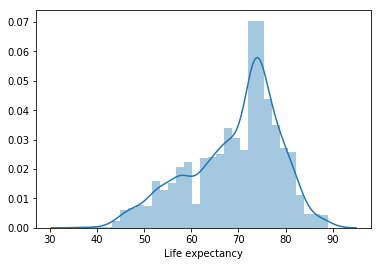

In [18]:
sns.distplot(df1["Life expectancy"])

### Heat map

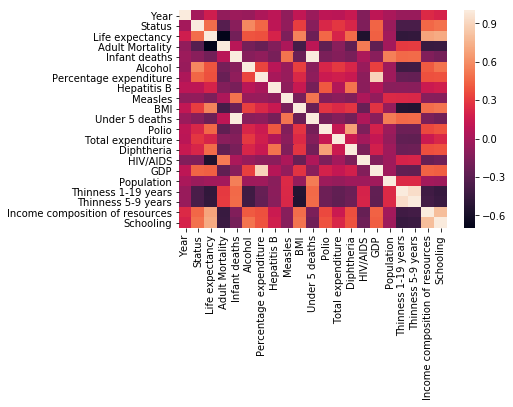

In [19]:
sns.heatmap(df1.corr())

### Data Analysis

In [20]:
from sklearn.model_selection import train_test_split

In [23]:
X = df1.drop(['Life expectancy'], axis = 1)

In [24]:
y = df1[["Life expectancy"]]

In [25]:
X.head()

,Year,Status,Adult Mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under 5 deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

### Regression analysis

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
lrpred =lr.predict(X_test)

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
print(mean_squared_error(y_test, lrpred)**(0.5))

3.9021244402990414


In [33]:
print("Accuracy of training set is ", lr.score(X_train, y_train))

Accuracy of training set is  0.8169511754768795


In [34]:
print("Accuracy of testing set is ", lr.score(X_test, y_test))

Accuracy of testing set is  0.8294542700921573


In [35]:
from sklearn.metrics import r2_score

In [36]:
lrscore = r2_score(y_test, lrpred)

In [37]:
lrscore

0.8294542700921573

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
Rfr = RandomForestRegressor(n_estimators = 60)

In [40]:
Rfr.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=60, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
Rfrpred = Rfr.predict(X_test)

In [42]:
print(mean_squared_error(y_test, Rfrpred)**(0.5))

1.802936196761679


In [43]:
print("Accuarcy of Training accuracy is ",Rfr.score(X_train, y_train))

Accuarcy of Training accuracy is  0.9943469221171451


In [44]:
print("Accuarcy of Testing accuracy is ",Rfr.score(X_test, y_test))

Accuarcy of Testing accuracy is  0.9635917893027498


In [45]:
Rfrscore = r2_score(y_test, Rfrpred)

In [46]:
Rfrscore

0.9635917893027499

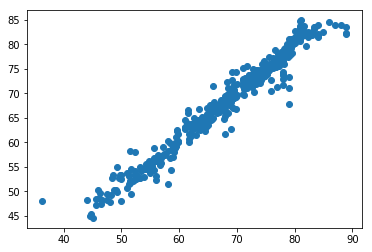

In [47]:
plt.scatter(y_test, Rfrpred)

In [48]:
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, Rfrpred))
print('MSE:', metrics.mean_squared_error(y_test, Rfrpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Rfrpred)))
print('Rfrscore', Rfrscore)

MAE: 1.1271169500359348
MSE: 3.250578929593468
RMSE: 1.802936196761679
Rfrscore 0.9635917893027499


In [50]:
!pip install watson-machine-learning-client

In [53]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-17 22:32:07,865 - watson_machine_learning_client.wml_client_error - WARNING - Error during getting IAM Token. (POST https://iam.cloud.ibm.com/oidc/token)
Status code: 400, body: {"context":{"requestId":"743e138e3ffe4e7b89286771851bb0fe","requestType":"incoming.OIDC_Token","userAgent":"python-requests/2.21.0","url":"https://iam.cloud.ibm.com","instanceId":"iamid-5.6-8068-1ad6140-5cc4f94df8-7d2fq","threadId":"134076","host":"iamid-5.6-8068-1ad6140-5cc4f94df8-7d2fq","startTime":"17.06.2020 22:32:07:785 GMT","endTime":"01.01.1970 00:00:00:000 GMT","elapsedTime":"0","locale":"en_US","clusterName":"iam-id-prlon02-tjwu"},"errorCode":"BXNIM0415E","errorMessage":"Provided API key could not be found"}
2020-06-17 22:33:42,361 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-17 22:34:08,447 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.
2020-06-17 22

In [56]:
#@hiddencell 



wml_credentials = {
  "apikey": "Zqasv0K4GpfTNoPGxc3hHvyqvj0iAYo6B_IRj1ontw1i",
  "instance_id": "3fed0e3a-8e67-45a4-b7e9-47f2a5be7f59",
  "url" : "https://eu-gb.ml.cloud.ibm.com",
}
    

In [57]:
client = WatsonMachineLearningAPIClient( wml_credentials)


In [62]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Manchala Jhansi Lakshmi", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "jhansim43@.com", 
               client.repository.ModelMetaNames.NAME: "Life_expectancy(3)"}

In [63]:
model_artifact = client.repository.store_model(Rfr, meta_props=model_props)

In [65]:
published_model_uid = client.repository.get_model_uid(model_artifact)

In [66]:
deployment = client.deployments.create(published_model_uid, name="Life_expectancy(3)")



#######################################################################################

Synchronous deployment creation for uid: 'fb7784ac-13f8-4d87-aabc-0444ff05f6e5' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='2a19ccfb-a9e3-4cc7-9cf0-42a1b73d7163'
------------------------------------------------------------------------------------------------




In [68]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

In [69]:
scoring_endpoint

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/3fed0e3a-8e67-45a4-b7e9-47f2a5be7f59/deployments/2a19ccfb-a9e3-4cc7-9cf0-42a1b73d7163/online'